# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [6]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [7]:
# Import neighborhoods_coordinates.csv to DataFrame
loc_file = Path('Data/neighborhoods_coordinates.csv')
loc_df = pd.read_csv(loc_file)
loc_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [19]:
# Import sfo_neighborhoods_census_data.csv to DataFrame
sfo_file = Path('Data/sfo_neighborhoods_census_data.csv')
sfo_df = pd.read_csv(sfo_file, index_col='year')
sfo_df.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [25]:
# Import housing_locations.csv to DataFrame
neighborhood_file = Path('Data/housing_locations.csv')
neighborhood_df = pd.read_csv(neighborhood_file)
neighborhood_df.reset_index(drop=True)
neighborhood_df.drop(columns={'Unnamed: 0'}, inplace=True)
neighborhood_df.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [32]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    housing_df = sfo_df['housing_units'].groupby(sfo_df.index).mean()
    
    # create figure
    housing_figure = plt.figure()
    housing_plot = housing_df.plot.bar(title = 'Housing Units in San Francisco from 2010 to 2016', xlabel = 'Year', ylabel = 'Housing Units', fontsize=12)
    
    # scale y limits
    housing_std = housing_df.std()
    housing_min = min(housing_df)
    housing_max = max(housing_df)
    housing_plot.set_ylim(housing_min - housing_std, housing_max + housing_std)
    
    # return figure
    plt.close(housing_figure)
    return pn.pane.Matplotlib(housing_figure, tight=True)


def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    avg_cost_df = sfo_df[['sale_price_sqr_foot', 'gross_rent']].groupby(sfo_df.index).mean()
    
    # create figure
    gross_rent_figure = plt.figure()
    gross_rent_plot = avg_cost_df['gross_rent'].plot(title = 'Average Gross Rent by Year', xlabel = 'Year', ylabel = 'Price per SqFt', fontsize=12, color ='red')
    
    # return figure
    plt.close(gross_rent_figure)
    return pn.pane.Matplotlib(gross_rent_figure, tight=True)


def average_sales_price():
    """Average Sales Price Per Year."""
    avg_cost_df = sfo_df[['sale_price_sqr_foot', 'gross_rent']].groupby(sfo_df.index).mean()
    
    # create figure
    sales_figure = plt.figure()
    sales_plot = avg_cost_df['sale_price_sqr_foot'].plot(title = 'Average Sale Price per SqFt by Year', xlabel = 'Year', ylabel = 'Price per SqFt', fontsize=12, color='purple')
    
    # return figure
    plt.close(sales_figure)
    return pn.pane.Matplotlib(sales_figure, tight=True)


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    price_df = sfo_df.groupby([sfo_df.index, 'neighborhood']).mean()
    price_df.reset_index(inplace=True)
    price_df.rename(columns={'level_0':'year'}, inplace=True)
    
    # create figure
    price_figure = price_df.hvplot.line('year', 'sale_price_sqr_foot', xlabel = 'Year', ylabel = 'Average Sale Price per SqFt', groupby = 'neighborhood', height = 500, width = 1000)
    
    # return figure
    return price_figure


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    expensive_df = sfo_df.groupby(by = ['neighborhood']).mean()
    expensive_df = expensive_df.sort_values(by = 'sale_price_sqr_foot', ascending=False).head(10)
    expensive_df.reset_index(inplace=True)
    
    #create figure
    expensive_figure = expensive_df.hvplot.bar('neighborhood', 'sale_price_sqr_foot', xlabel = 'Neighborhood', ylabel = 'Average Sale Price per SqFt', height = 500, width = 1000, rot=90)
    
    return expensive_figure


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # YOUR CODE HERE!
    # This section is optional

    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!
    # This section is optional



def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    # This section is optional



def neighborhood_map():
    """Neighborhood Map."""
    # Set the mapbox access token
    px.set_mapbox_access_token(map_box_api)

    # Create a scatter mapbox to analyze neighborhood info
    neighborhood_map = px.scatter_mapbox(neighborhood_df, lat='Lat', lon='Lon', size='sale_price_sqr_foot', color='gross_rent',
                                         color_continuous_scale=px.colors.cyclical.Twilight, size_max=15, zoom=12, height = 500, width = 1000,
                                         hover_name='Neighborhood', title='Average Sale Price Per Square Foot and Gross Rent in San Francisco')
    return neighborhood_map


def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!
    # This section is optional


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [33]:
# Create a Title for the Dashboard
dash_title = '## Housing Units Analysis for San Francisco'

# Create a tab layout for the dashboard
statistical_plots = pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())
plots_by_neighborhood = pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods(), neighborhood_map())
all_plots = pn.Column(dash_title, statistical_plots, plots_by_neighborhood)


# Create the dashboard
housing_dashboard = pn.Tabs(
    ("All Plots", all_plots),
    ("Statistical Plots", statistical_plots),
    ("Plots by Neighborhood", plots_by_neighborhood)
)

## Serve the Panel Dashboard

Traceback (most recent call last):
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\panel\viewable.py", line 273, in _on_msg
 doc.unhold()
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\document\document.py", line 669, in unhold
 self._trigger_on_change(event)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\document\document.py", line 1180, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\document\document.py", line 1198, in _with_self_as_curdoc
 return f()
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\util\callback_manager.py", line 161, in invoke
 callback(attr, old, new)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\panel\reactive.py", line 301, in _comm_change
 self._process_events({attr: new})
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\panel\reactive.py", line 262, in _process_events
 self.param.set_param(**self_events)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 1904, in set_param
 return self_.update(kwargs)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 1877, in update
 self_._batch_call_watchers()
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 2038, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 2000, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 649, in caller
 return function()
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 387, in _depends
 return func(*args, **kw)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\panel\pane\plotly.py", line 153, in _update_figure_layout
 self._figure.plotly_relayout(self.relayout_data)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\plotly\basedatatypes.py", line 2601, in plotly_relayout
 relayout_changes = self._perform_plotly_relayout(relayout_data)
 File "C:\Users\arewa\anaconda3\envs\pyvizenv\lib\site-packages\plotly\basedatatypes.py", line 2641, in _perform_plotly_relayout
 key_path_str=key_path_str
ValueError: 
Invalid property path 'mapbox._derived' for layout

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
            [2] Plotly(Figure, visible=False)
    [1] Row
        [0] Matplotlib(Figure, tight=True)
        [1] Matplotlib(Figure, tight=True)
        [2] Matplotlib(Figure, tight=True)
    [2] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [1] HoloViews(Bars)
        [2] Plotly(Figure, visible=False)
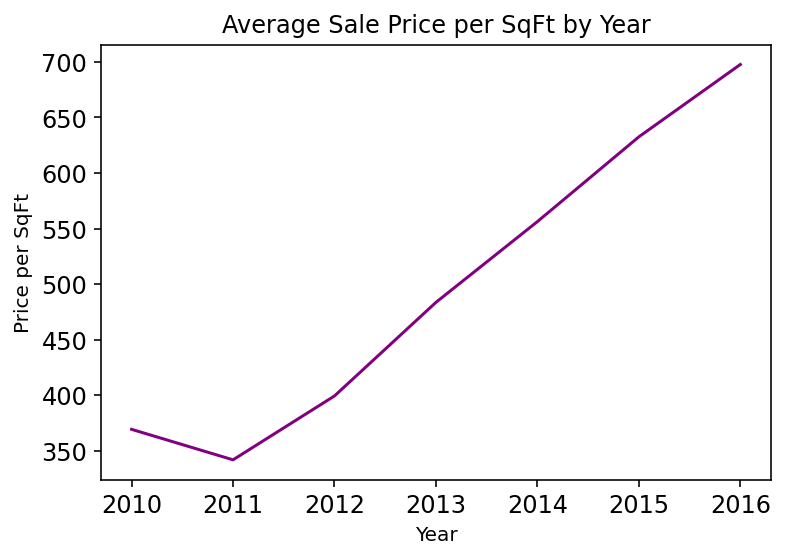
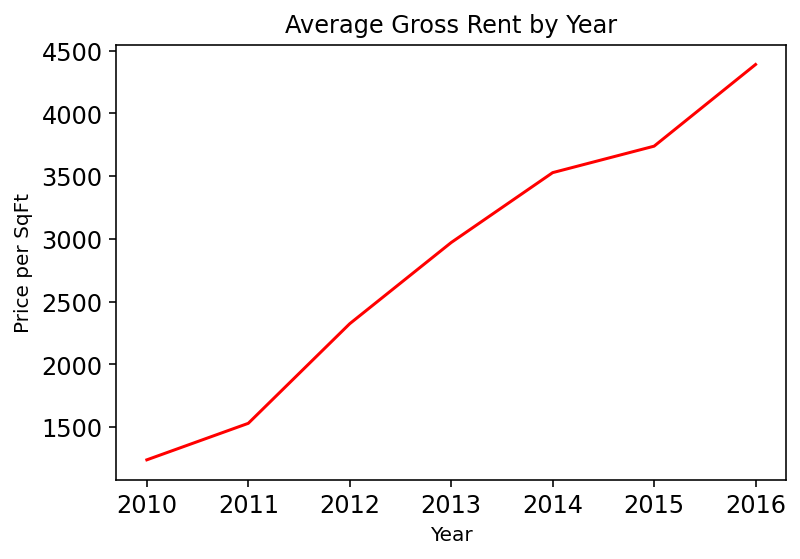
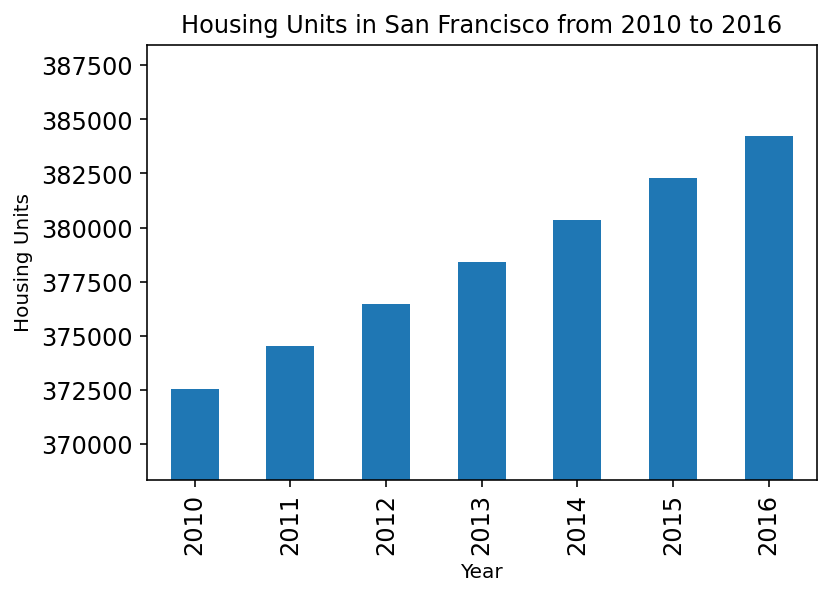
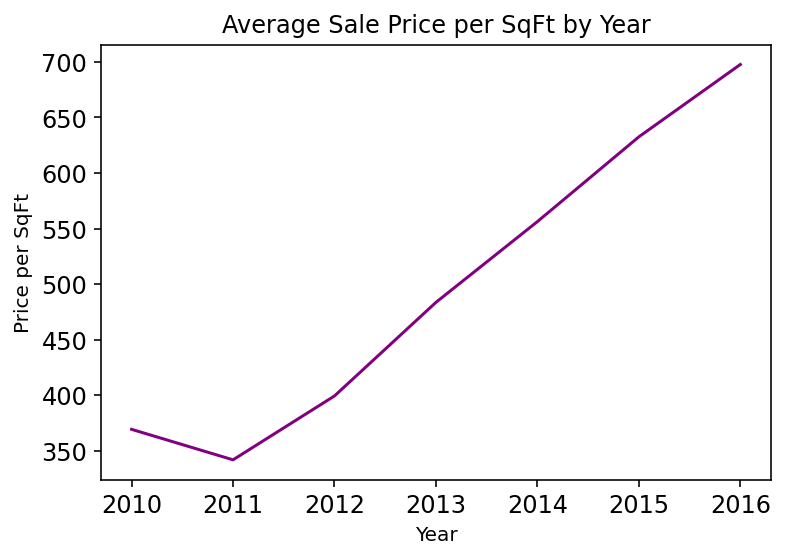
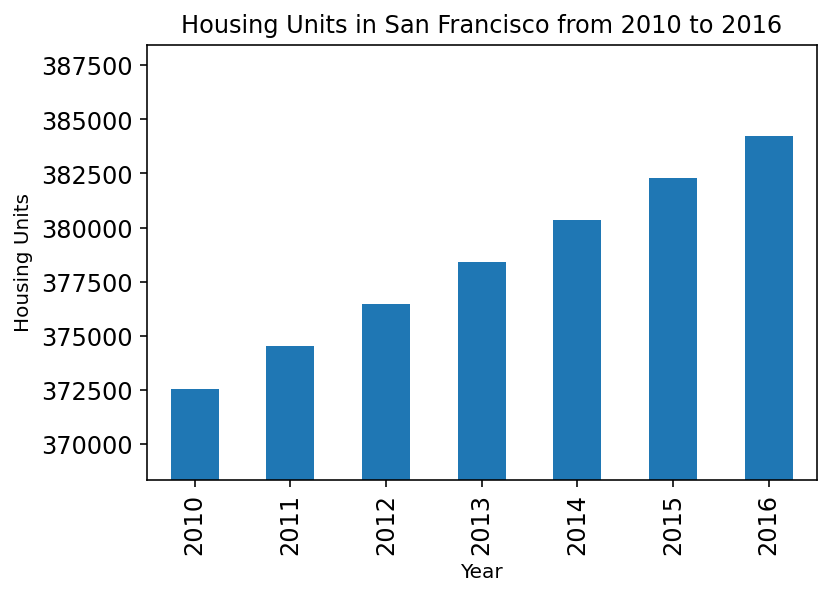
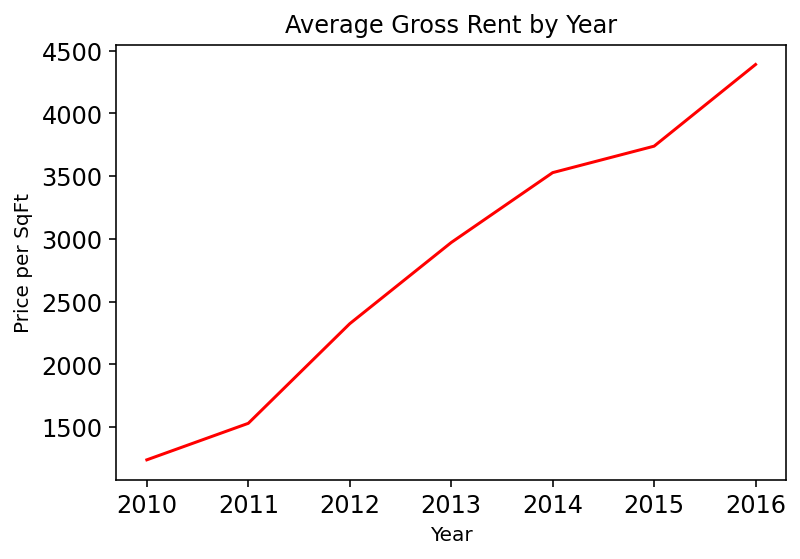

In [34]:
# Serve the dashboard
housing_dashboard.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()